In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import os
import yaml

In [2]:
# Load config
with open("../config.yaml", "r") as f:
    config = yaml.safe_load(f)

RAW_PATH = config["data"]["raw_path"]
PROCESSED_PATH = config["data"]["processed_path"]

In [3]:
# Load data
reviews_data = pd.read_csv(os.path.join(RAW_PATH, "Reviews.csv"))
reviews_data = reviews_data.dropna(subset=["Text", "Score"])

In [4]:
print("Dataset shape:", reviews_data.shape)
reviews_data.head()

Dataset shape: (568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
# Check for missing values
reviews_data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [6]:
# Add new feature: review_length
reviews_data["ReviewLength"] = reviews_data["Text"].apply(lambda x: len(str(x).split()))

# Clean text to remove HTML and special chars
def clean_text(text):
    text = re.sub(r"<.*?>","", text)
    text = re.sub(r"[^a-zA-Z0-9\s]","", text)
    return text.lower()

reviews_data["CleanedText"] = reviews_data["Text"].apply(clean_text)

# Convert Unix timestamp to date
reviews_data["ReviewDate"] = pd.to_datetime(reviews_data["Time"], unit='s')

# Compute Helpfulness ratio
reviews_data["HelpfulnessRatio"] = reviews_data["HelpfulnessNumerator"] / (reviews_data["HelpfulnessDenominator"] + 1e-5) # Avoid divide by zero

In [7]:
reviews_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ReviewLength,CleanedText,ReviewDate,HelpfulnessRatio
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,48,i have bought several of the vitality canned d...,2011-04-27,0.999990
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,product arrived labeled as jumbo salted peanut...,2012-09-07,0.000000
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,94,this is a confection that has been around a fe...,2008-08-18,0.999990
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,41,if you are looking for the secret ingredient i...,2011-06-13,0.999997
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,27,great taffy at a great price there was a wide...,2012-10-21,0.000000


Text(0.5, 1.0, 'Review Star Rating Distribution')

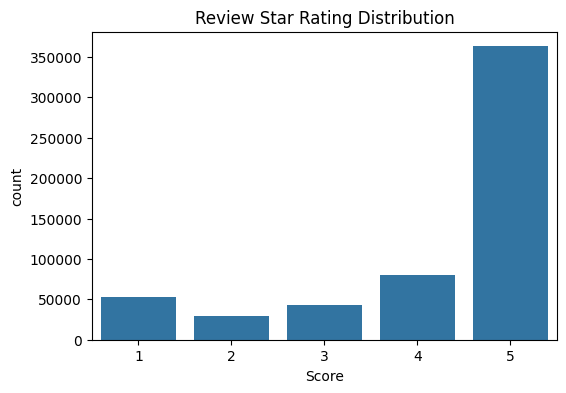

In [8]:
# Plotting star rating distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Score", data=reviews_data, order=sorted(reviews_data["Score"].unique()))
plt.title("Review Star Rating Distribution")

Text(0, 0.5, 'Frequency')

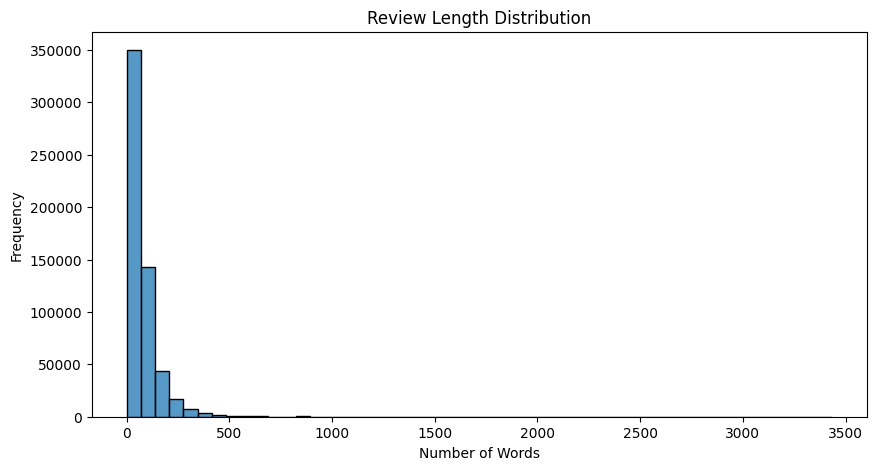

In [9]:
# Plotting Review Length Distribution
plt.figure(figsize=(10,5))
sns.histplot(reviews_data["ReviewLength"], bins=50)
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")

Text(0.5, 1.0, 'Word Cloud of Sample Cleaned Text')

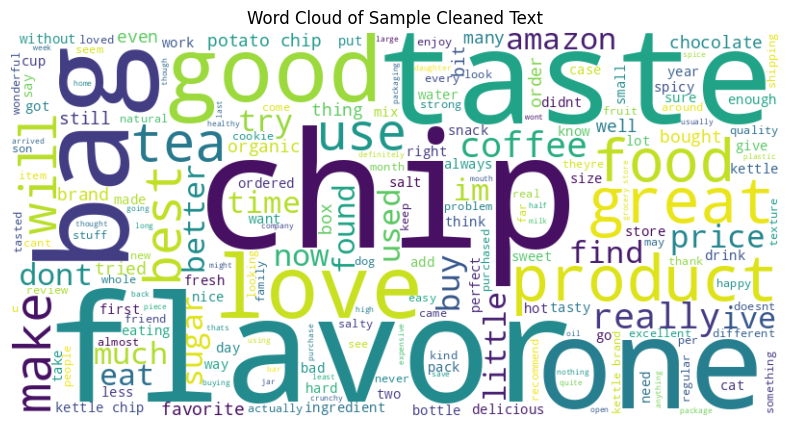

In [10]:
# Plotting WordCloud of cleaned text
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(reviews_data["CleanedText"].head(1000)))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Sample Cleaned Text")

In [11]:
columns_to_keep = [
    "ProductId", "UserId", "Summary", "Text", "CleanedText", "Score", "ReviewLength",
    "HelpfulnessNumerator", "HelpfulnessDenominator", "HelpfulnessRatio", "ReviewDate"
]

# Save cleaned subset to processed folder
reviews_data_cleaned = reviews_data[columns_to_keep]
reviews_data_cleaned.to_csv(os.path.join(PROCESSED_PATH, "Reviews_cleaned.csv"), index=False)
print("Saved cleaned reviews to:", os.path.join(PROCESSED_PATH,"Reviews_cleaned.csv"))

Saved cleaned reviews to: ../data/processed/Reviews_cleaned.csv
